In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/HP/Dropbox/My PC (LAPTOP-S7638K91)/Desktop/Credit_card_fraud_detection/Online_Payment_Fraud_Data.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Data Visulisation

In [8]:
data["isFraud"] = data["isFraud"].astype(int)
data["isFlaggedFraud"] = data["isFlaggedFraud"].astype(int)
data["step"] = data["step"].astype(int)

In [9]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


<AxesSubplot:xlabel='type', ylabel='count'>

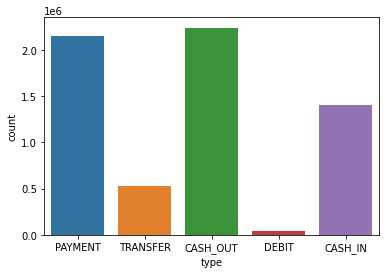

In [10]:
sns.countplot(x = 'type', data = data)

<AxesSubplot:xlabel='type', ylabel='amount'>

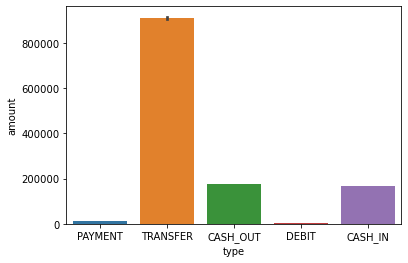

In [11]:
sns.barplot(x='type', y='amount', data=data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

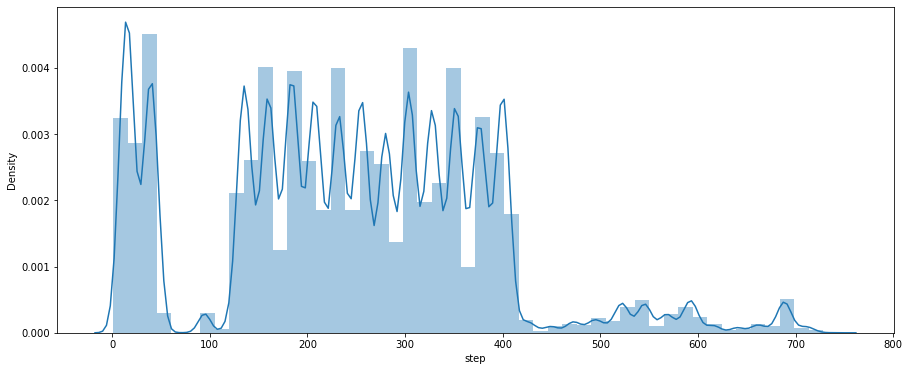

In [12]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

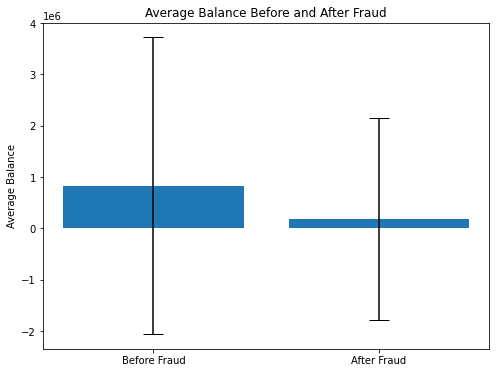

In [13]:
# Calculate average balances before and after fraud
average_original_balance = data[data['isFraud'] == 0]['oldbalanceOrg'].mean()
average_new_balance = data[data['isFraud'] == 1]['newbalanceOrig'].mean()

# Calculate standard deviations for error bars
std_original_balance = data[data['isFraud'] == 0]['oldbalanceOrg'].std()
std_new_balance = data[data['isFraud'] == 1]['newbalanceOrig'].std()

# Create a bar plot with error bars
plt.figure(figsize=(8, 6))
plt.bar(['Before Fraud', 'After Fraud'], [average_original_balance, average_new_balance], yerr=[std_original_balance, std_new_balance], capsize=10)
plt.title('Average Balance Before and After Fraud')
plt.ylabel('Average Balance')
plt.show()

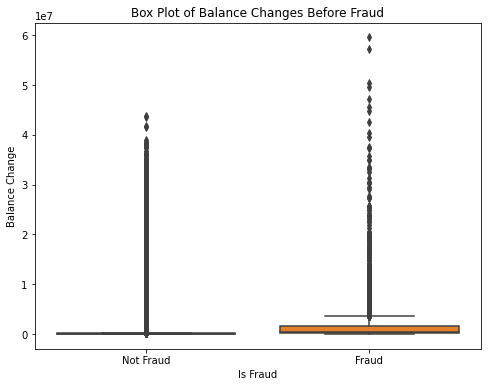

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=data)
plt.title('Box Plot of Balance Changes Before Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

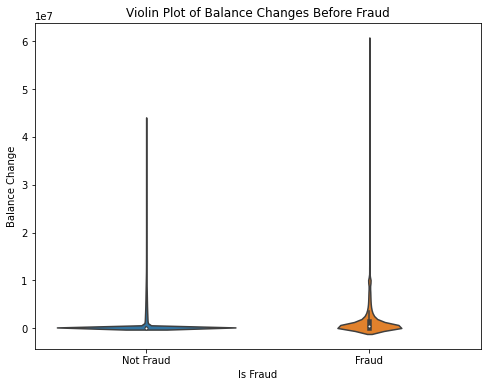

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='isFraud', y='oldbalanceOrg', data=data)
plt.title('Violin Plot of Balance Changes Before Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

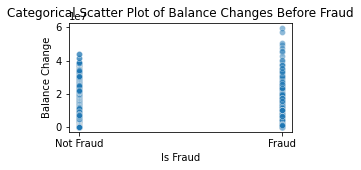

In [19]:
plt.figure(figsize=(4, 2))
sns.scatterplot(x='isFraud', y='oldbalanceOrg', data=data, alpha=0.5)
plt.title('Categorical Scatter Plot of Balance Changes Before Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

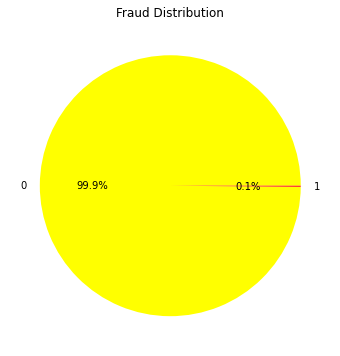

In [16]:
fraud_counts = data['isFraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['yellow', 'red'])
plt.title('Fraud Distribution')
plt.show()

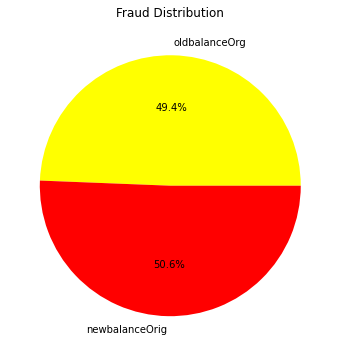

In [17]:
sumamount=data[['oldbalanceOrg','newbalanceOrig']].sum()
plt.figure(figsize=(6, 6))
plt.pie(sumamount, labels=sumamount.index, autopct='%1.1f%%', colors=['yellow', 'red'])
plt.title('Fraud Distribution')
plt.show()

In [18]:
cc = []
nc = []

for i in data.columns:
    if data[i].dtype == 'object':
        cc.append(i)
    else:
        nc.append(i)

In [21]:
cc

['type', 'nameOrig', 'nameDest']

In [22]:
nc

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

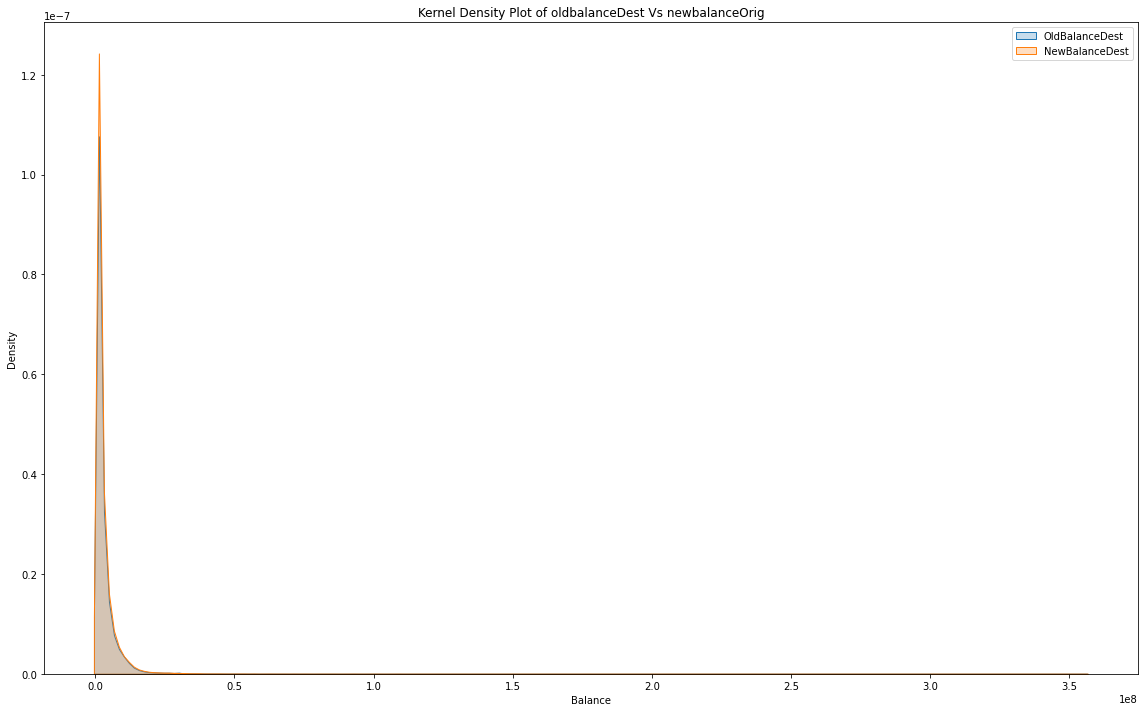

In [20]:
plt.figure(figsize=(16, 10))
sns.kdeplot(data=data['oldbalanceDest'], shade=True, label='OldBalanceDest')
sns.kdeplot(data=data['newbalanceDest'], shade=True, label='NewBalanceDest')
plt.title('Kernel Density Plot of oldbalanceDest Vs newbalanceOrig')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

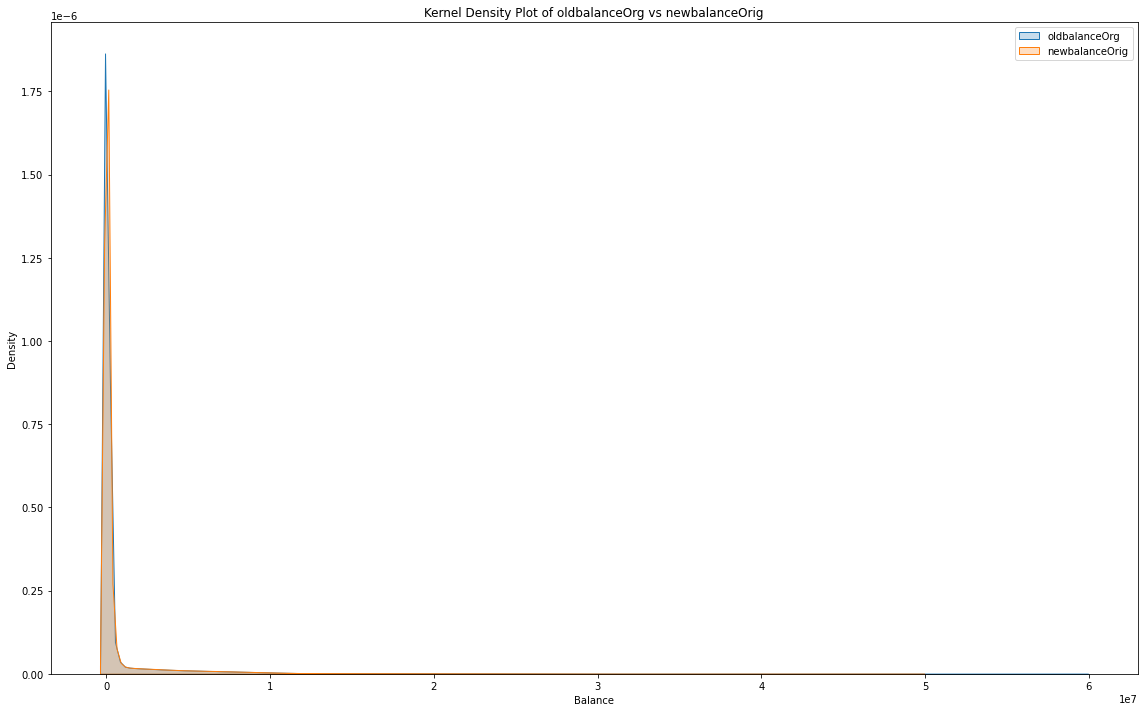

In [23]:
plt.figure(figsize=(16, 10))
sns.kdeplot(data=data['oldbalanceOrg'], shade=True, label='oldbalanceOrg')
sns.kdeplot(data=data['newbalanceOrig'], shade=True, label='newbalanceOrig')
plt.title('Kernel Density Plot of oldbalanceOrg vs newbalanceOrig')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

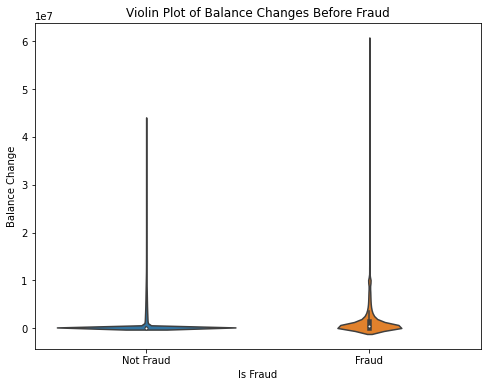

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='isFraud', y='oldbalanceOrg', data=data)
plt.title('Violin Plot of Balance Changes Before Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Balance Change')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

<AxesSubplot:>

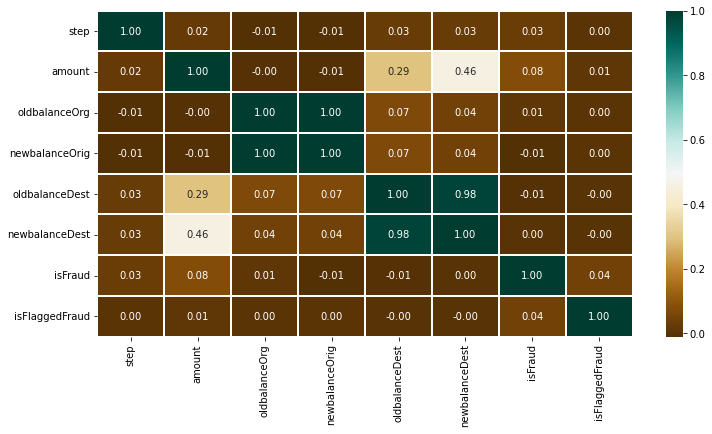

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [10]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [11]:
data_new['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

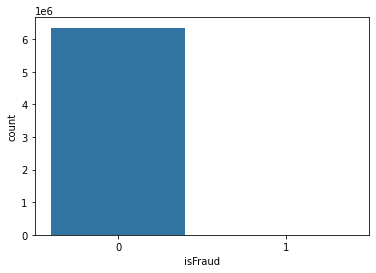

In [29]:
sns.countplot(x = 'isFraud', data = data_new)

The Data has a great imbalance hence we will use resample techniques to balance the sample 

In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1)
y = data_new['isFraud']

In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

In [14]:
categorical_features = [6,7,8,9]

print("Original dataset shape:", Counter(y))

# Apply SMOTENC to balance the dataset
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

print("Resampled dataset shape:", Counter(y_resampled))

Original dataset shape: Counter({0: 6354407, 1: 8213})
Resampled dataset shape: Counter({0: 6354407, 1: 6354407})


In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [59]:
!pip install xgboost

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

In [ ]:
svc_clf = SVC(kernel = 'rbf', probability = True)
svc_clf.fit(X_train, y_train)
train_preds = svc_clf.predict_proba(X_train)[: , 1]
print('Training Accuracy : ', ras(y_train, train_preds))
y_preds = svc_clf.predict_proba(X_test)[:,1]
print('Validation Accuracy : ', ras(y_test, y_preds))

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=7,criterion='entropy', random_state=7)
rf_classifier.fit(X_train, y_train)
train_preds = rf_classifier.predict_proba(X_train)[: , 1]
print('Training Accuracy : ', ras(y_train, train_preds))
y_preds = rf_classifier.predict_proba(X_test)[:,1]
print('Validation Accuracy : ', ras(y_test, y_preds))

Training Accuracy :  0.9999999983999153
Validation Accuracy :  0.9961524902251601


In [17]:
xgb_class = XGBClassifier().fit(X_train, y_train)
train_preds = xgb_class.predict_proba(X_train)[:,1]
print('Training Accuracy : ', ras(y_train, train_preds))
y_preds = xgb_class.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))

Training Accuracy :  0.9999694936438628
Validation Accuracy :  0.9999712650777064


In [44]:
logistic_class = LogisticRegression(solver='liblinear')
logistic_class.fit(X_train, y_train)
train_preds = logistic_class.predict_proba(X_train)[: , 1]
print('Training Accuracy : ', ras(y_train, train_preds))
y_preds = logistic_class.predict_proba(X_test)[:,1]
print('Validation Accuracy : ', ras(y_test, y_preds))

Training Accuracy :  0.9727988029295436
Validation Accuracy :  0.965395101987942


In [18]:
y_predict = xgb_class.predict(X_test)
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
4343509,0,0
410044,0,0
10522549,1,1
1467409,0,0
8677127,1,1
6623391,1,1
2202428,0,0
7464977,1,1
10396024,1,1
5806584,0,0


In [19]:
y_test_proba = xgb_class.predict_proba(X_test)
print(y_test_proba.shape)

(3812645, 2)


In [20]:
y_test_proba[0:5,:]

array([[9.9997014e-01, 2.9840992e-05],
       [9.9999988e-01, 1.2801985e-07],
       [1.5677810e-03, 9.9843222e-01],
       [1.0000000e+00, 2.9186381e-08],
       [5.9604645e-07, 9.9999940e-01]], dtype=float32)

In [21]:
import numpy as np

# Given array in scientific notation
array_in_scientific = y_test_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.9999701380729675' '0.0000298409922834']
 ['0.9999998807907104' '0.0000001280198489']
 ['0.0015677809715271' '0.9984322190284729']
 ['1.0000000000000000' '0.0000000291863813']
 ['0.0000005960464478' '0.9999994039535522']]


In [22]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)

['0.0000298409922834' '0.0000001280198489' '0.9984322190284729' ...
 '0.0000000000000000' '0.0000002620541011' '0.9934050440788269']


In [23]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

print(Results.head(10))

          Actual  Predictions     Prob(Class = 1)
4343509        0            0  0.0000298409922834
410044         0            0  0.0000001280198489
10522549       1            1  0.9984322190284729
1467409        0            0  0.0000000291863813
8677127        1            1  0.9999994039535522
6623391        1            1  0.9893586635589600
2202428        0            0  0.0000466209712613
7464977        1            1  0.9977983236312866
10396024       1            1  0.9953106045722961
5806584        0            0  0.0000048106812756


In [24]:
#Generate the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1902496    3813]
 [   1392 1904944]]


Text(69.0, 0.5, 'True Label')

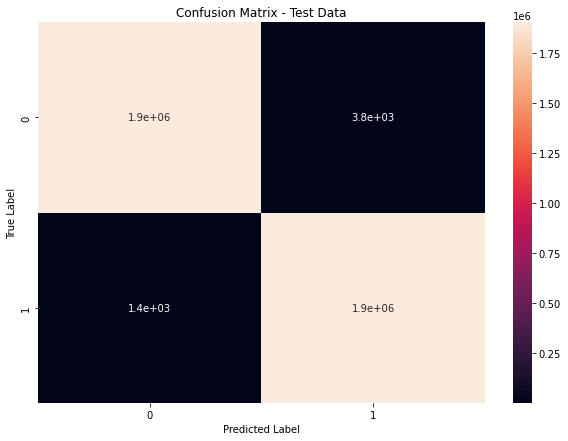

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

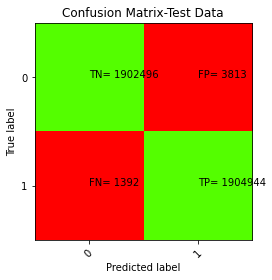

In [26]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [27]:
#Calculate common error metrics for a 2-class classifier

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906309
           1       1.00      1.00      1.00   1906336

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645



In [38]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

In [35]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling to the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

Class distribution after undersampling: Counter({0: 8213, 1: 8213})


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [40]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.9688121392369125
Validation Accuracy :  0.9681410413417995

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9991579739390299

SVC(probability=True) : 
Training Accuracy :  0.9604565109152052
Valid

In [41]:
xgb_class = XGBClassifier().fit(X_train, y_train)
y_predict = xgb_class.predict(X_test)
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
6055134,1,1
5188022,1,1
4129254,0,0
5555890,0,0
5046728,0,0
2794964,0,0
1059581,1,1
2448582,0,0
6021369,1,1
6362348,1,1


In [42]:
y_test_proba = xgb_class.predict_proba(X_test)
print(y_test_proba.shape)

(4928, 2)


In [43]:
y_test_proba = xgb_class.predict_proba(X_test)
print(y_test_proba.shape)

(4928, 2)


In [44]:
import numpy as np

# Given array in scientific notation
array_in_scientific = y_test_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.0000101327896118' '0.9999898672103882']
 ['0.0001260042190552' '0.9998739957809448']
 ['0.9999726414680481' '0.0000273488603852']
 ['0.9999784231185913' '0.0000215628024307']
 ['0.7867069244384766' '0.2132930606603622']]


In [45]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)

['0.9999898672103882' '0.9998739957809448' '0.0000273488603852' ...
 '0.9999731779098511' '0.9999731779098511' '0.9999703168869019']


In [46]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

print(Results.head(10))

         Actual  Predictions     Prob(Class = 1)
6055134       1            1  0.9999898672103882
5188022       1            1  0.9998739957809448
4129254       0            0  0.0000273488603852
5555890       0            0  0.0000215628024307
5046728       0            0  0.2132930606603622
2794964       0            0  0.0000155434827320
1059581       1            1  0.9999417066574097
2448582       0            0  0.0000074737822615
6021369       1            1  0.9997406601905823
6362348       1            1  0.9999179840087891


In [47]:
#Generate the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[2452   27]
 [   7 2442]]


Text(69.0, 0.5, 'True Label')

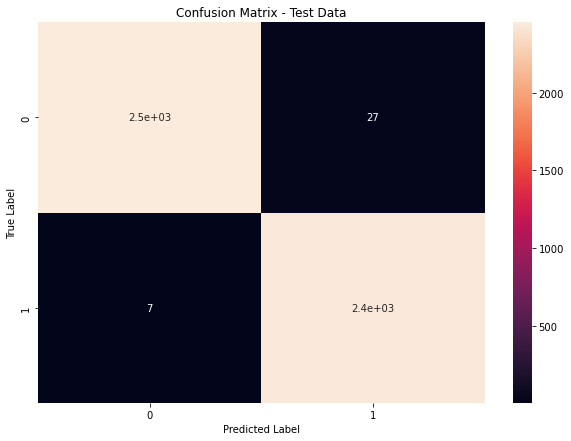

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

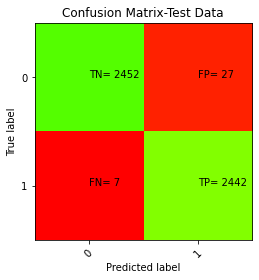

In [49]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [50]:
#Calculate common error metrics for a 2-class classifier

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



Final Interpretation : When we use OverSampling using SMOTENC technique the we have got:

                 1) Out of all the payments that the model predicted would get Fraud, almost 100% of them actually are.(Precision)
                 2) Out of all the payments that are actually Fraud, the model predicted this outcome correctly for 100% of those payments.(Recall)
                 3) We have got a overall 99.9% accurecy using XgBoost when we have used XgBoost Classifier after performing Oversampling which is the highest accurecy of all .
                 4) But due to OverSampling the dataset becomes too large so the model becomes too complex and needs too much time to be fitted.
                 
         But When we used UnderSampling the model predicts better, we have got:
         
                 5) Out of all the payments that the model predicted would get Fraud, in 99% of the cases of them that actually are fraud.(Precision)
                 6) Out of all the payments that are actually Fraud, the model predicted this outcome almost correctly for 100% of those payments.(Recall)
                 7) Also we have got overall 99.9% accureccy when we have used XgBoost Classifier after performing undersampling.
                 8) Here the dataset is not too big so the model complexity and time required are also less than the 
                 previous.

So the latter one is more Useful.